# Analysis of Russell Ranch Century Experiment

In this notebook I analyze data from the Russell Ranch Century Experiment to understand how use of irrigation, fertilizer, and compost impact crop yields.

This data is publicly available at https://asi.ucdavis.edu/programs/rr/research/data and is cited as:

Russell Ranch Sustainable Agriculture Facility. 2020. Cover crop biomass yields. Davis, CA: Russell Ranch Electronic Data Archives: CC-001. [Database]. https://asi.ucdavis.edu/programs/rr/research/data

The meta data file is available at: https://asi.ucdavis.edu/sites/g/files/dgvnsk5751/files/inline-files/CenturyExperiment_metadata.pdf.

In [1]:
# import packages
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Import data files

Four data files are available for download from the above website. These files include information on:

1. CROPS: plots, crops grown, and irrigation type used
2. IRR: irrigation amounts applied
- HARVEST: harvest measurements
- NUT_COMP: fertilizer and compost nutrient composition
- NUT_AMT: fertilizer and compost application amounts


In [2]:
# import data files
crops = pd.read_csv("/Users/emma/Documents/Data_Science/climate_agriculture/Russell_Ranch/Sheet 1.csv")
irr = pd.read_csv("/Users/emma/Documents/Data_Science/climate_agriculture/Russell_Ranch/File 2.csv")
harvest = pd.read_csv("/Users/emma/Documents/Data_Science/climate_agriculture/Russell_Ranch/File 3.csv")
nut_comp = pd.read_csv("/Users/emma/Documents/Data_Science/climate_agriculture/Russell_Ranch/Sheet 4.csv")
nut_amt = pd.read_csv("/Users/emma/Documents/Data_Science/climate_agriculture/Russell_Ranch/Sheet 5.csv")

In [3]:
# check for data type
crops.dtypes
irr.dtypes
harvest.dtypes
nut_comp.dtypes
nut_amt.dtypes

experiment_name          object
plot_name                object
plot_side                object
date                     object
year                    float64
fertilizer_name          object
fertilizer_unit          object
fertilization_amount      int64
dtype: object

## Clean data frames

Date columns in irr, harvest, and nut_amt need to be converted to datetime data type.

In [4]:
irr.date = pd.to_datetime(irr.date)
harvest.date = pd.to_datetime(harvest.date)
nut_amt.date = pd.to_datetime(nut_amt.date)

Nut_amt does not have year specified. Determine year from date column.

In [5]:
nut_amt.year = nut_amt.date.dt.year

There are some empty date and year columns. Looking at the data, it's clear that the years 2014 and 2015 were not entered. Making a guess for the overall year date seems like a reasonable choice, but I will leave the date column empty because choosing an exact date is more unknown. The null values in date will serve as a reminder that I made up this data.

In [6]:
pd.set_option('display.max_rows', 200)
nut_amt[nut_amt.date.isnull()]   # find null values
nut_amt[(nut_amt.fertilizer_name =='2018_pm_compost')&(nut_amt.index>2369)]   # display values of interest
nut_amt.year[(nut_amt.index>2381)&(nut_amt.index<2394)]=2014.0   # set year to 2014
nut_amt.year[(nut_amt.index>2393)&(nut_amt.index<2406)]=2015.0   # set year to 2015

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


For ease of working with the plot_name data, let's create a plot_number variable as an integer in each of the dataframes it exists within.

In [7]:
crops['plot_number'] = crops.plot_name.astype('int')
harvest['plot_number'] = harvest.plot_name.astype('int')
irr['plot_number'] = irr.plot_name.astype('int')
nut_amt['plot_number'] = nut_amt.plot_name.astype('int')
crops.columns

Index(['experiment_name', 'plot_name', 'plot_side', 'block', 'year',
       'system_code', 'crop', 'irrigation_type', 'plot_number'],
      dtype='object')

Nut_amt and nut_comp dataframes are inconsistent in how the label the fertilizer names that are based on dates. Redefine using only underscores (i.e. nut_amt uses: '15-15-15-6','8/24/2006', '0-32-16'; nut_comp uses: '15_15_15_6','8_24_6', '0_32_16'). I will change nut_amt to match nut_comp.

In [8]:
nut_amt.loc[nut_amt.fertilizer_name=='15-15-15-6','fertilizer_name'] = '15_15_15_6'
nut_amt.loc[nut_amt.fertilizer_name=='8/24/2006','fertilizer_name'] = '8_24_6'
nut_amt.loc[nut_amt.fertilizer_name=='0-32-16','fertilizer_name'] = '0_32_16'
nut_amt.fertilizer_name.unique()

array(['ammonium_nitrate', 'urea_granular', 'zinc_sulfate',
       'ammonium_sulfate', '15_15_15_6', 'triple_superphosphate',
       'CAN_27', 'UAN32', '8_24_6', '0_32_16', 'KCl', '1994_pm_compost',
       '1995_pm_compost', '1996_pm_compost', '1997_pm_compost',
       '2001_pm_compost', '2002_pm_compost', '2003_pm_compost',
       '2004_pm_compost', '2005_pm_compost', '2006_pm_compost',
       '2007_pm_compost', '2009_pm_compost', '2018_pm_compost'],
      dtype=object)

## Explore the data by making some simple plots.


### Harvest yields
How do harvest yields vary in each field through time?


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


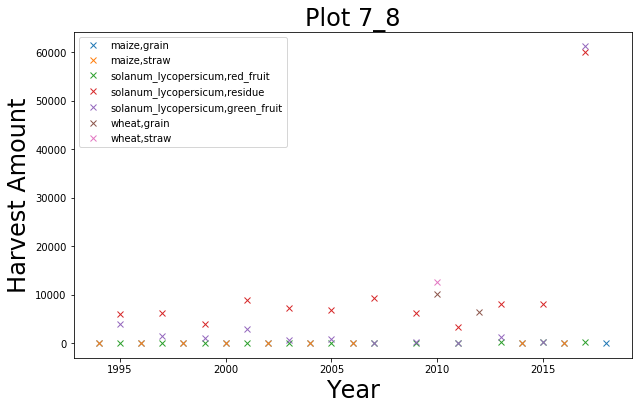

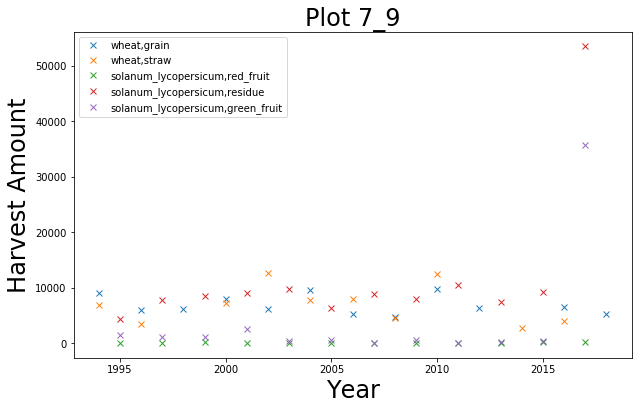

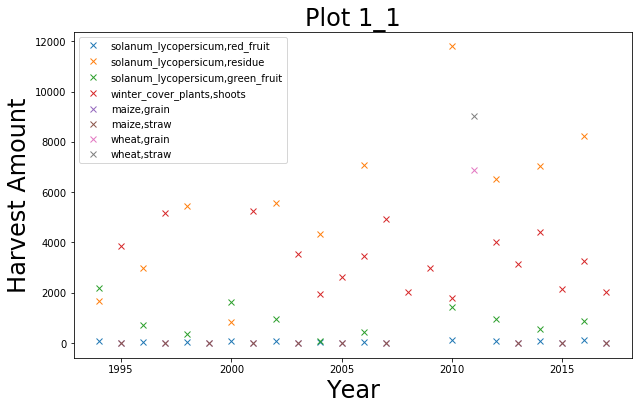

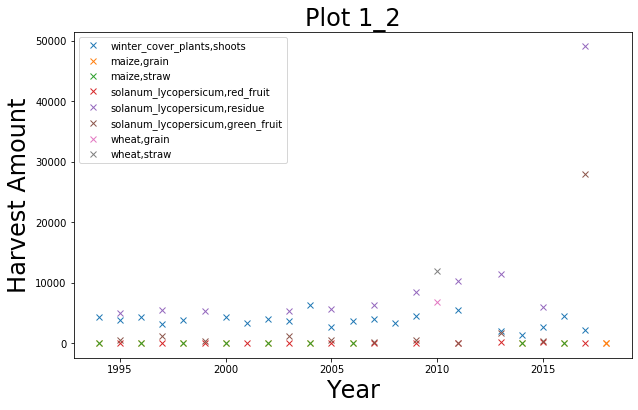

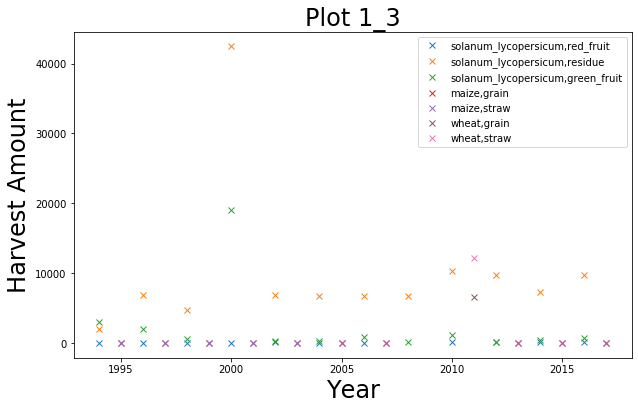

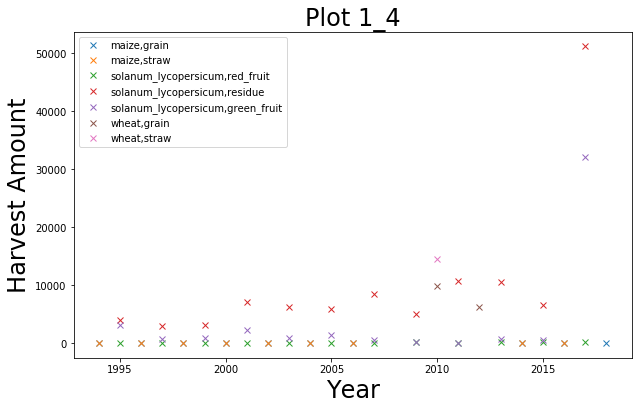

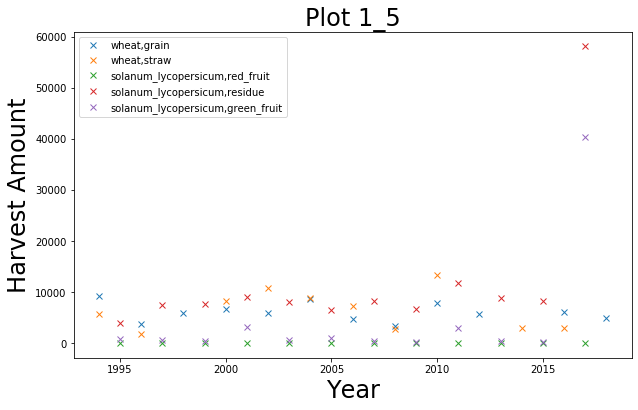

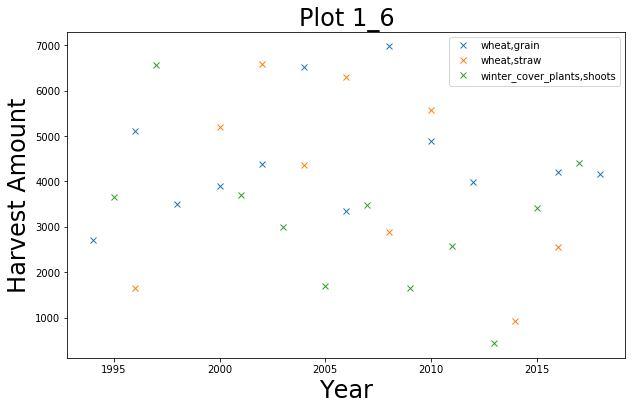

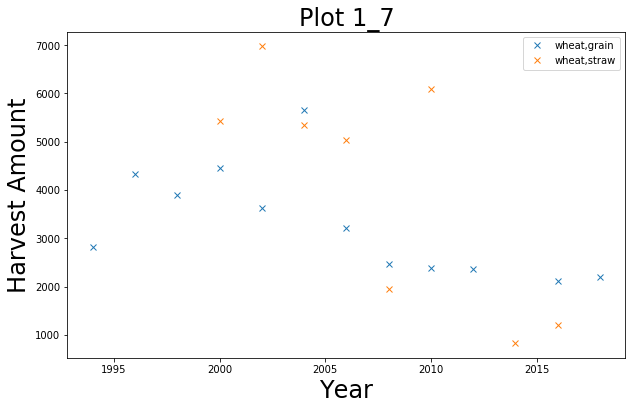

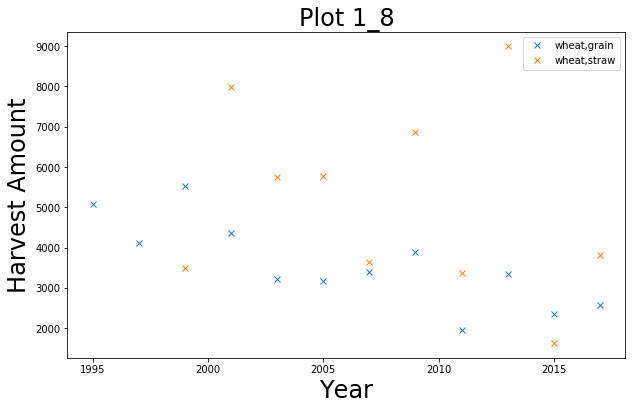

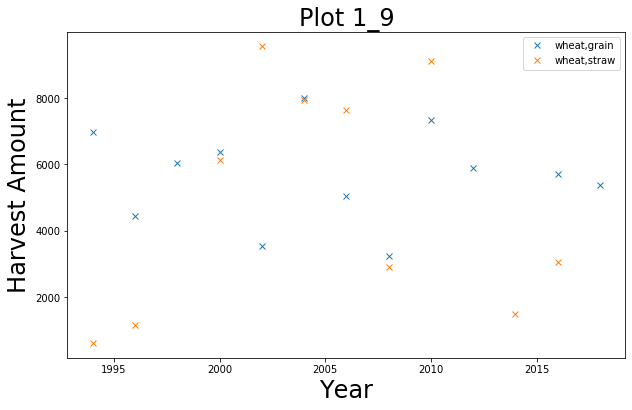

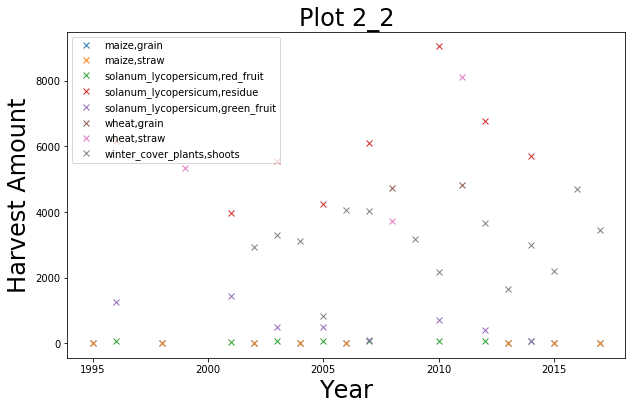

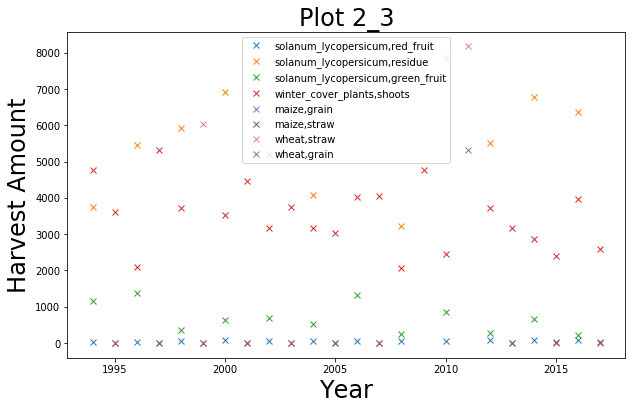

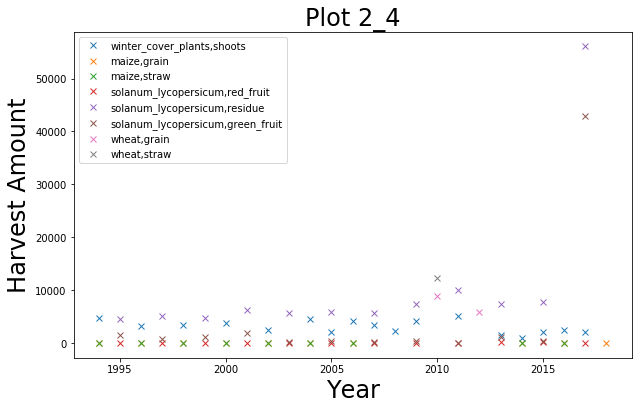

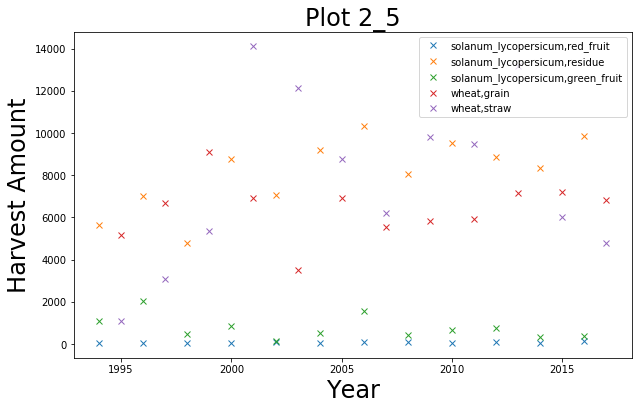

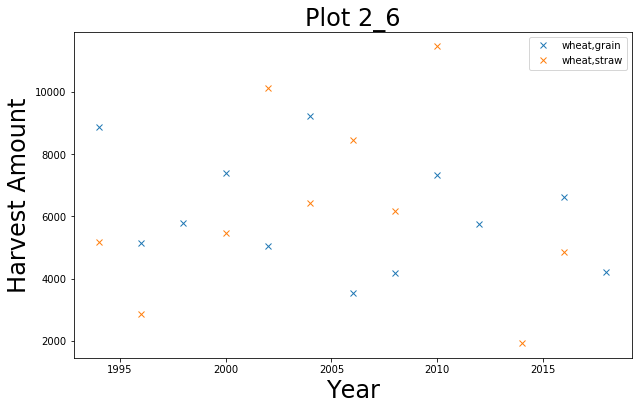

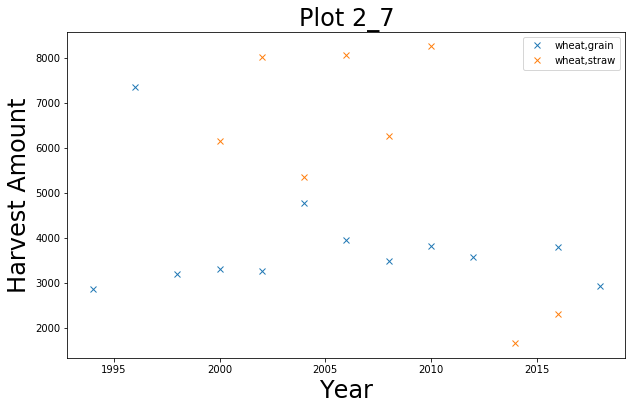

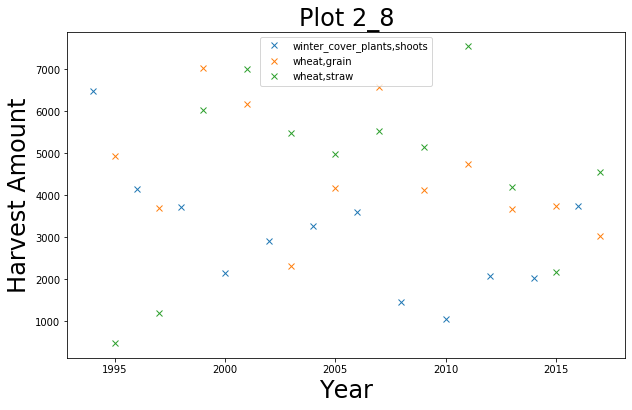

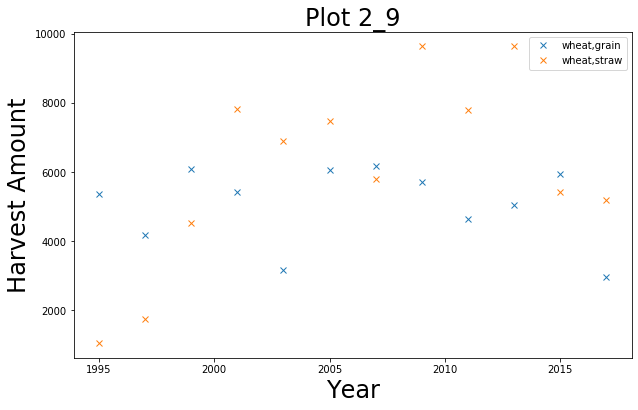

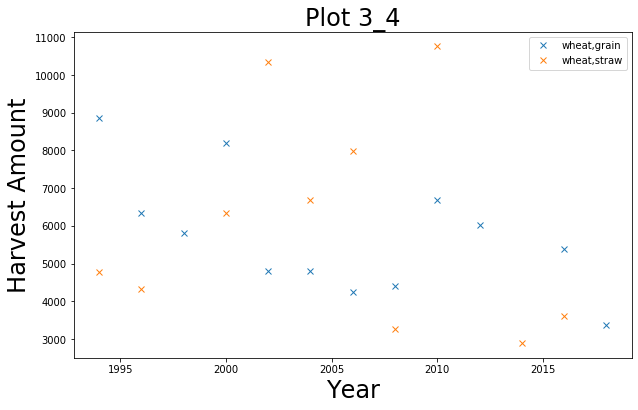

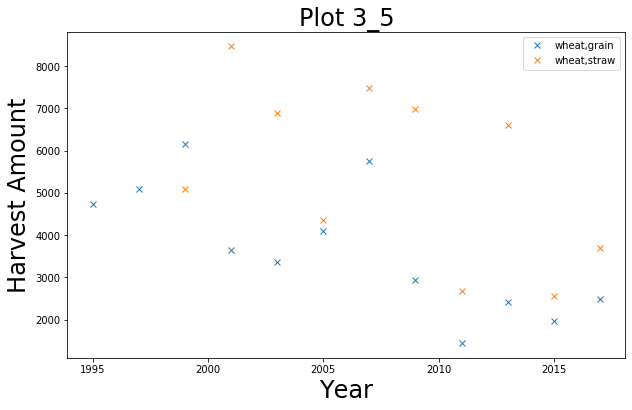

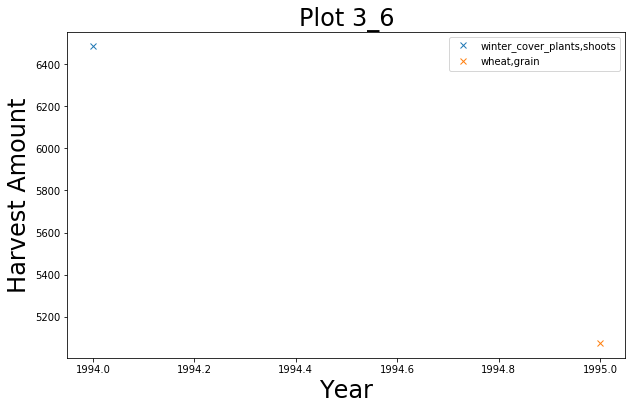

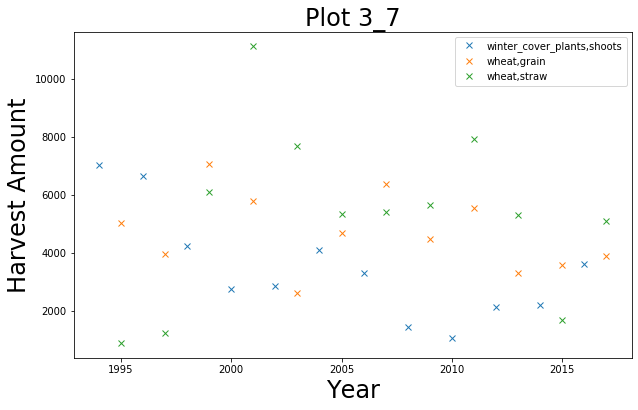

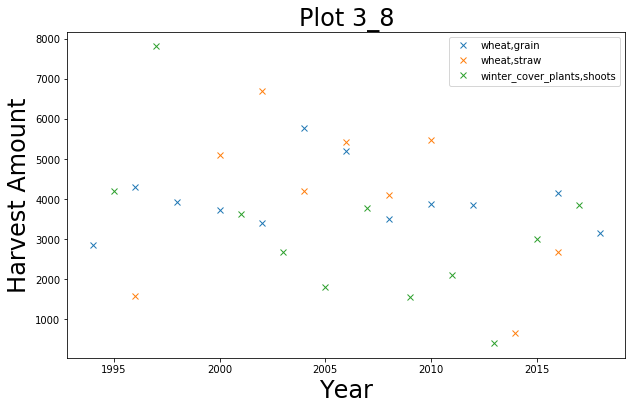

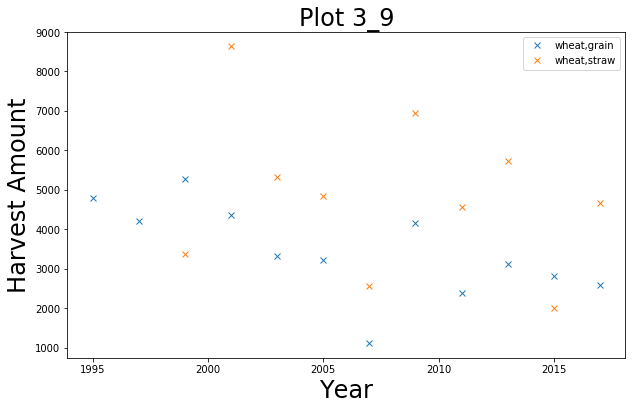

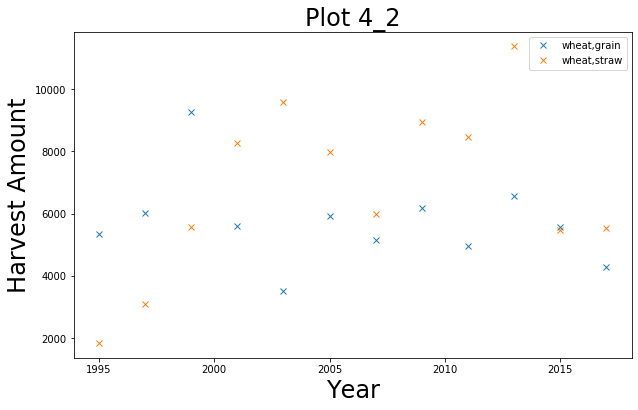

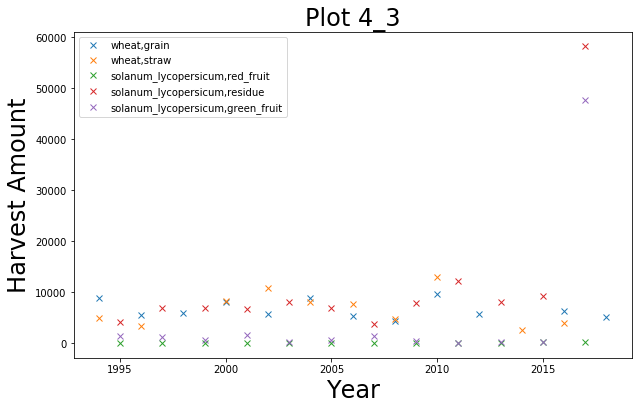

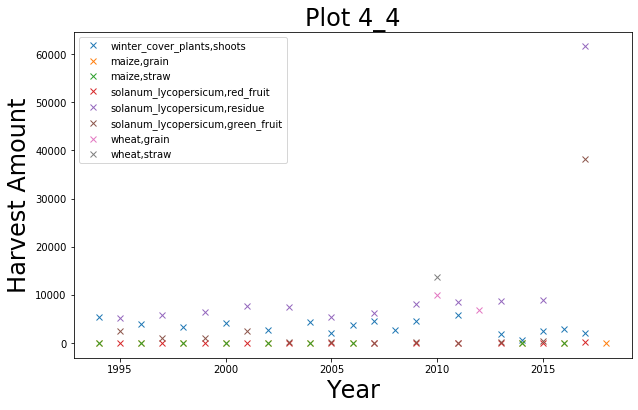

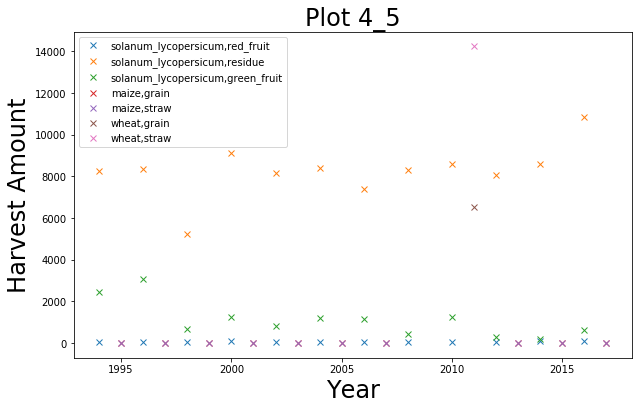

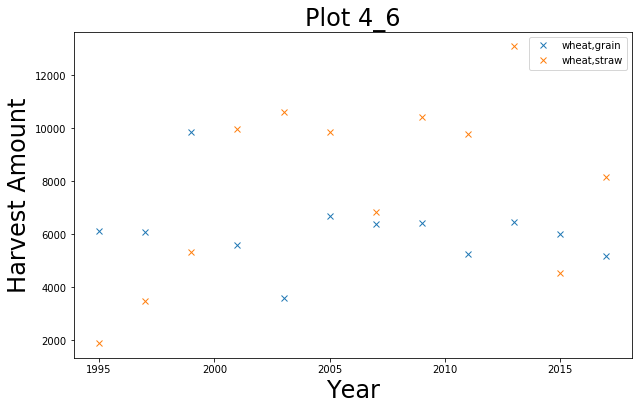

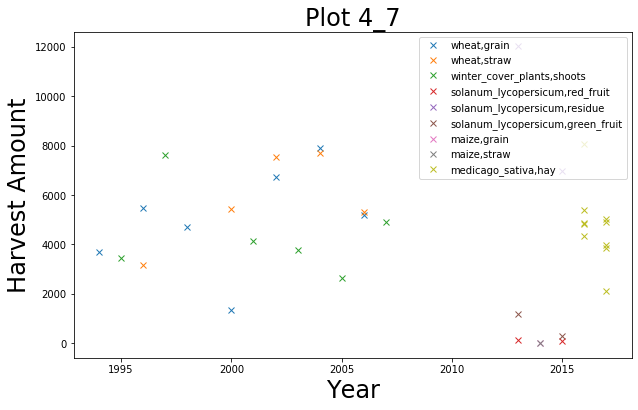

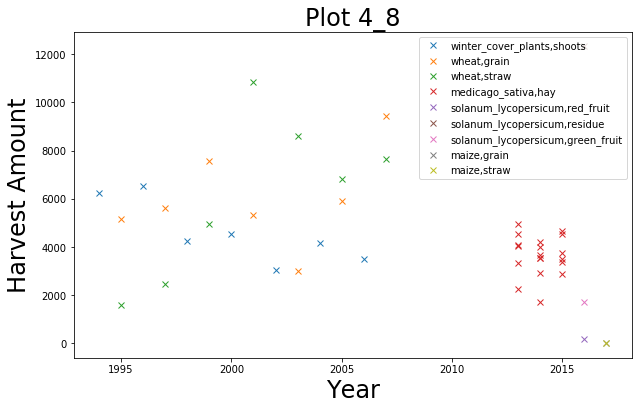

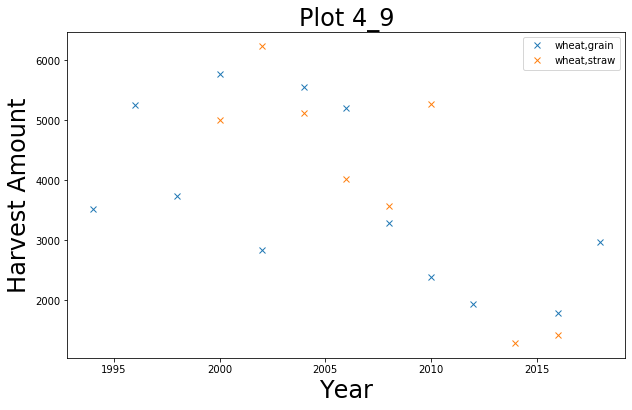

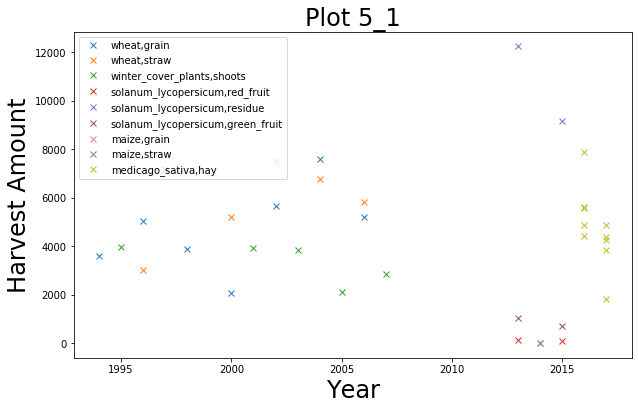

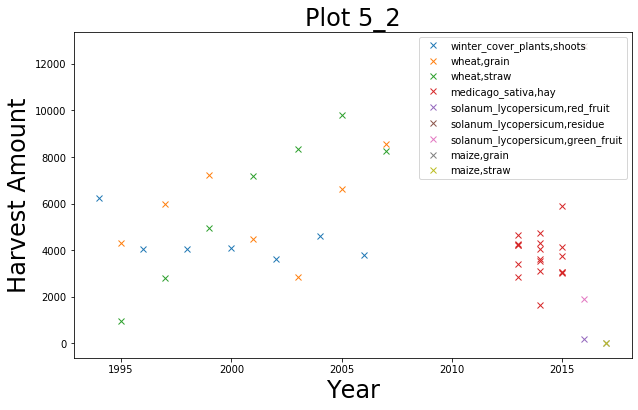

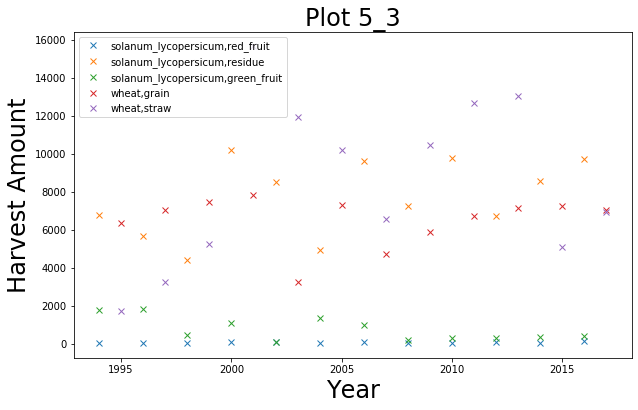

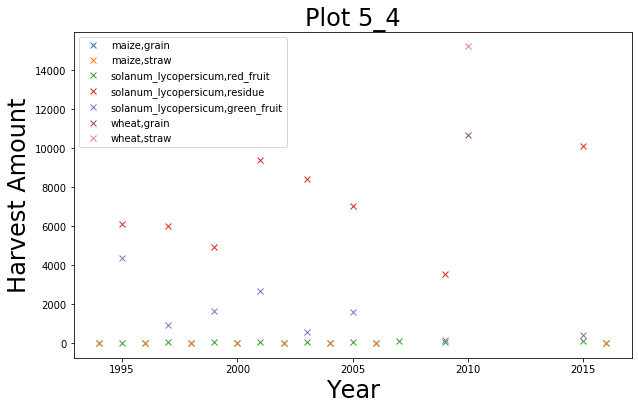

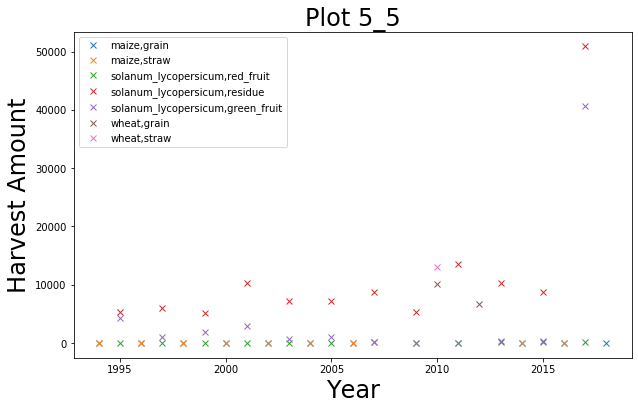

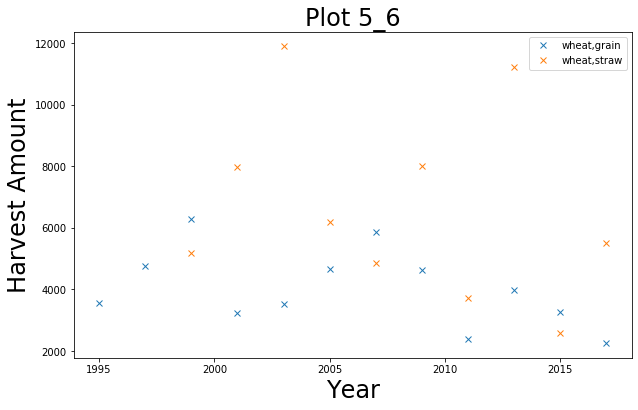

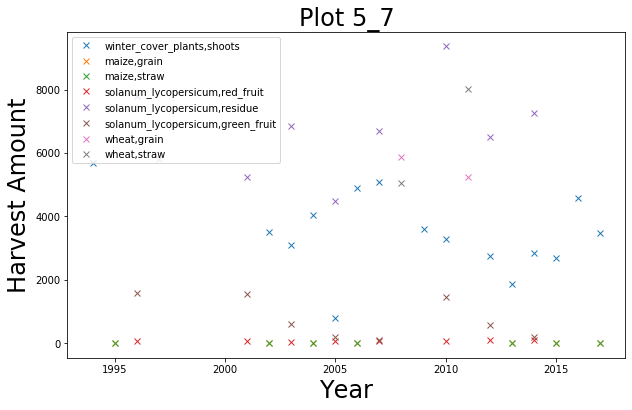

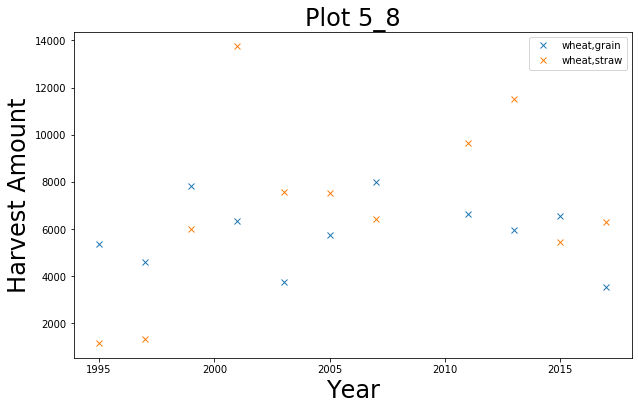

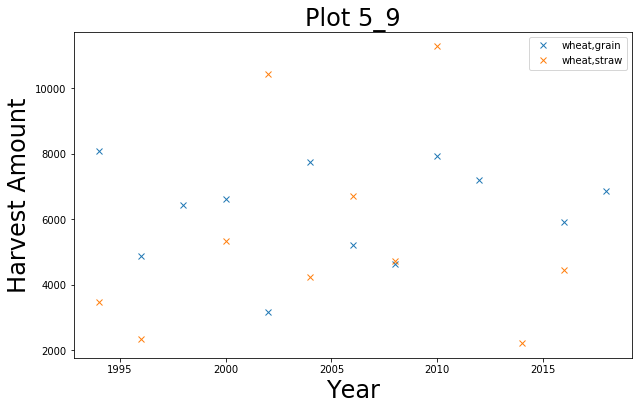

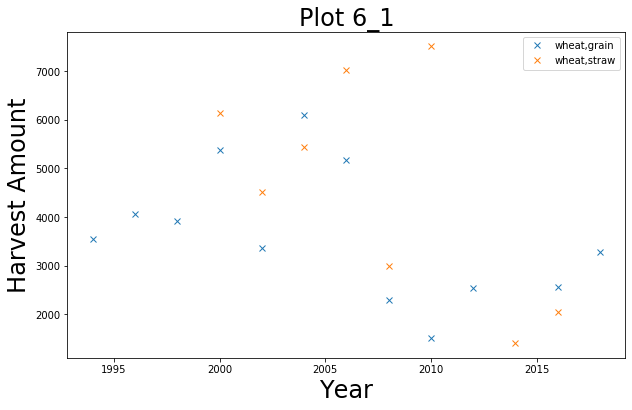

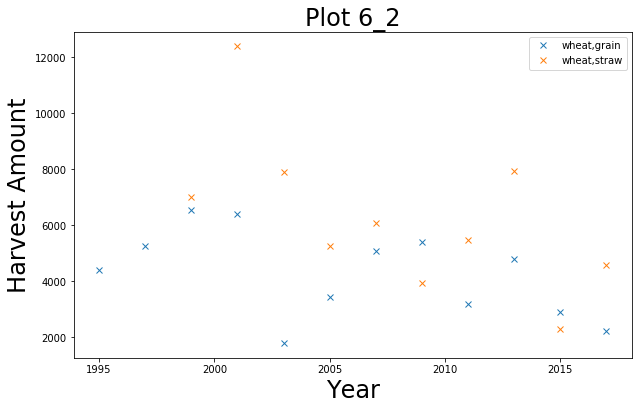

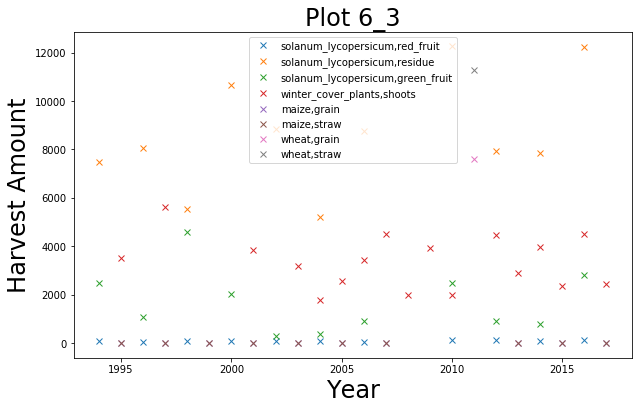

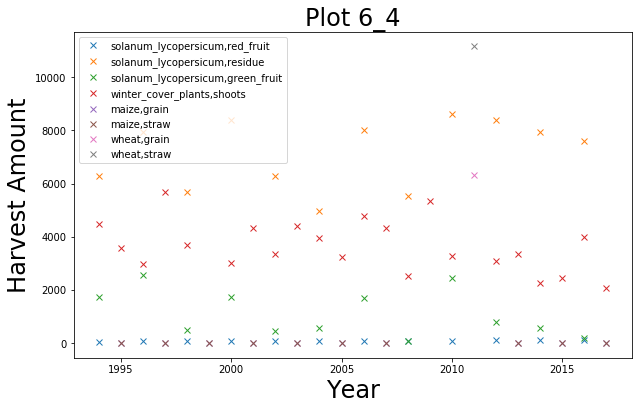

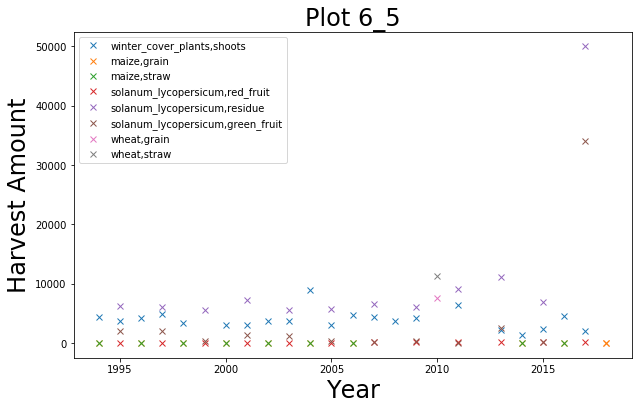

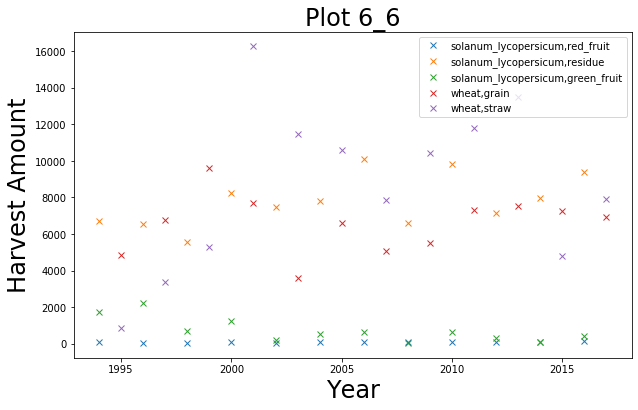

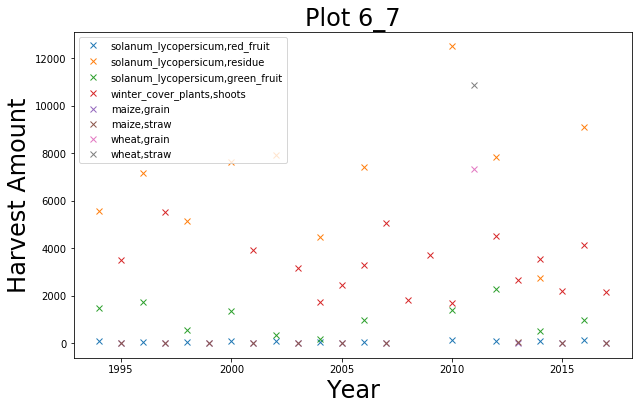

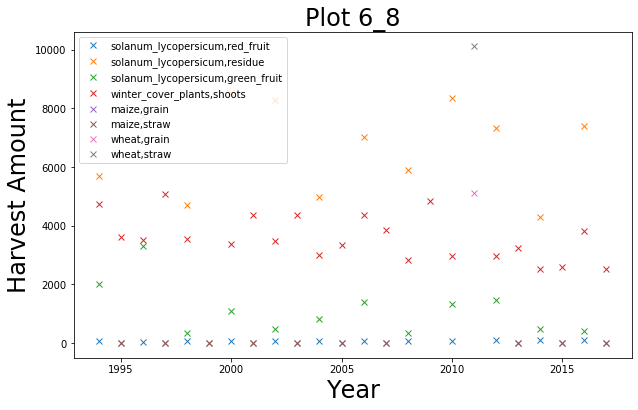

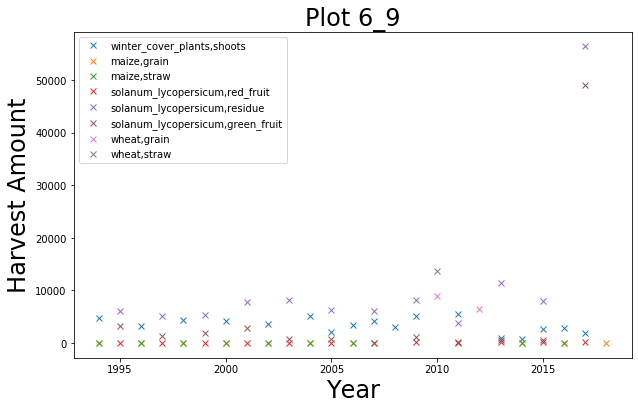

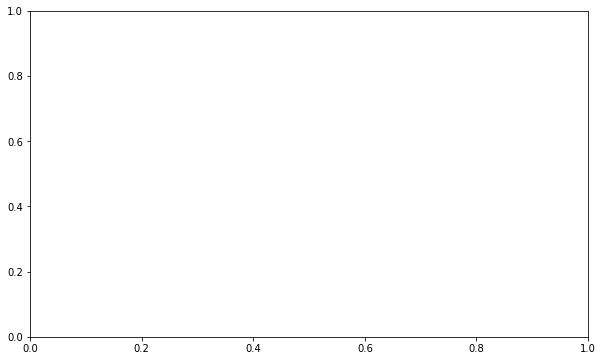

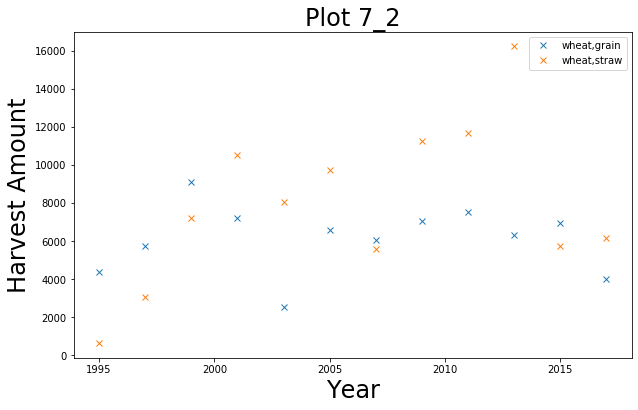

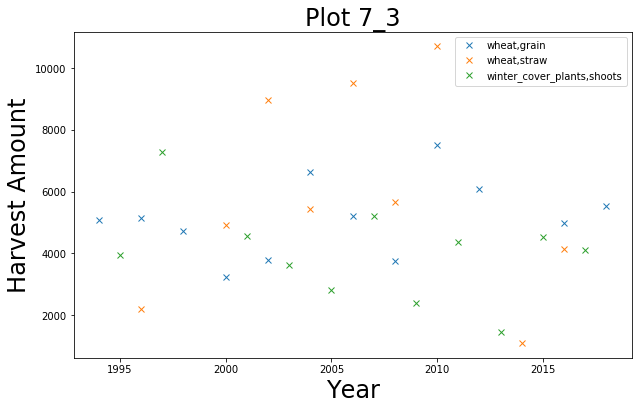

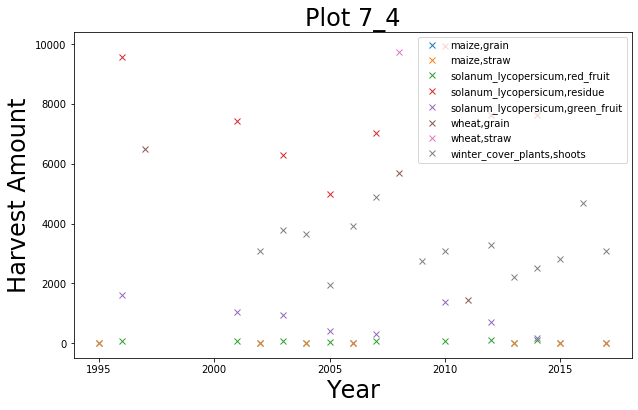

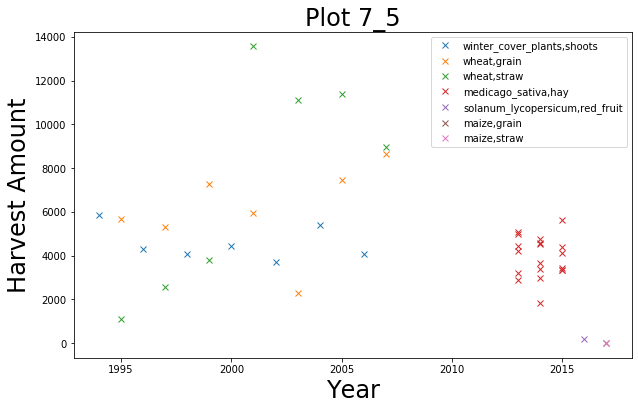

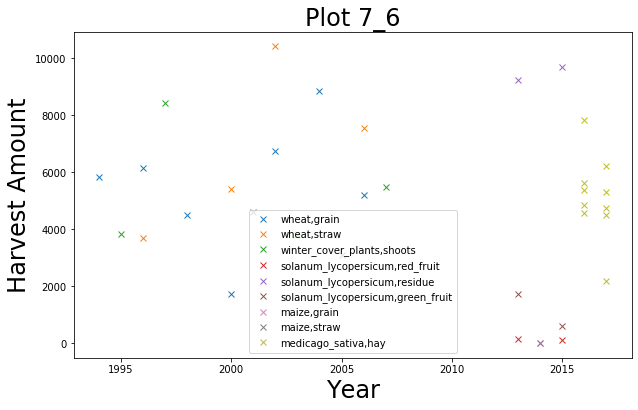

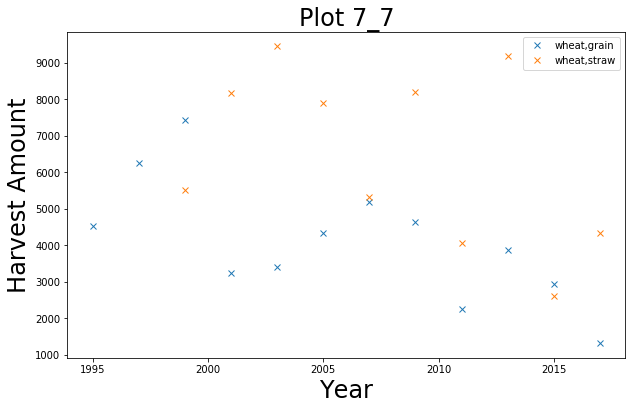

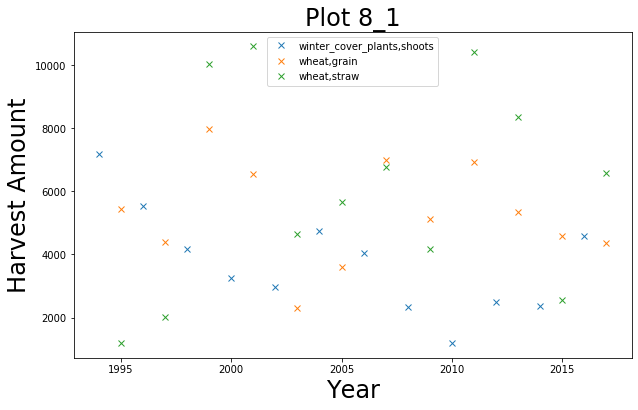

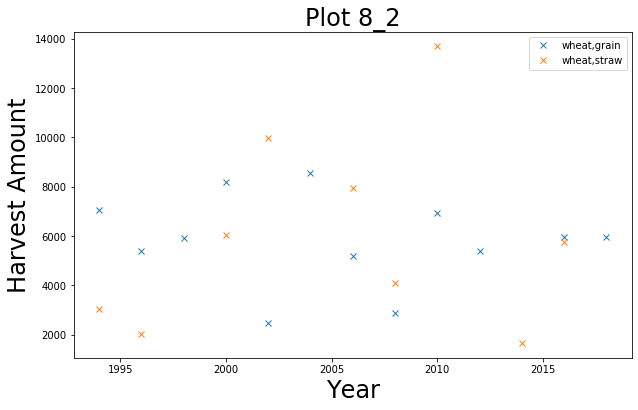

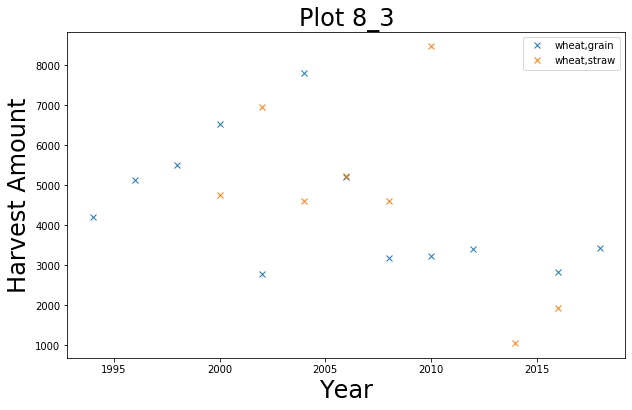

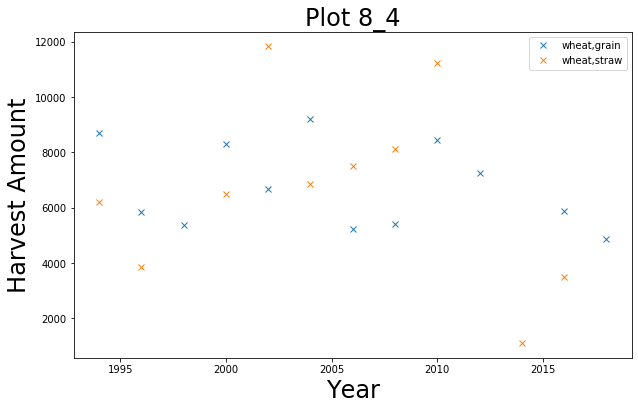

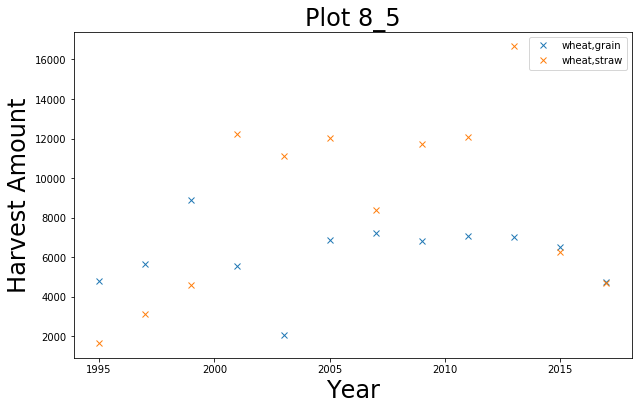

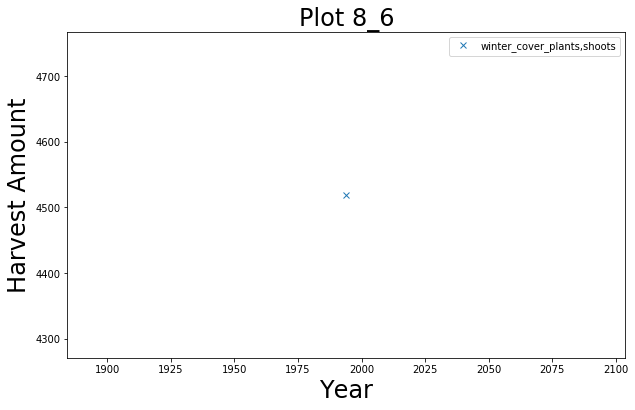

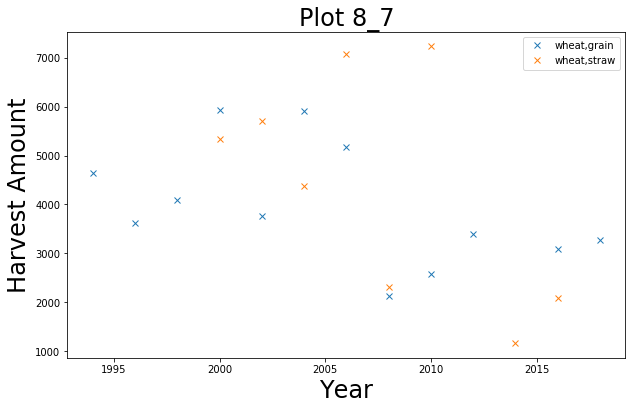

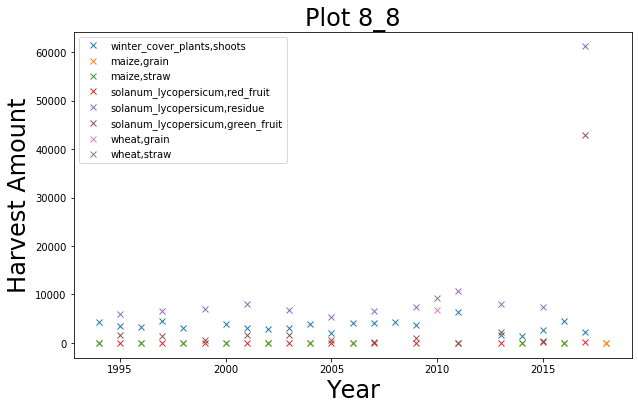

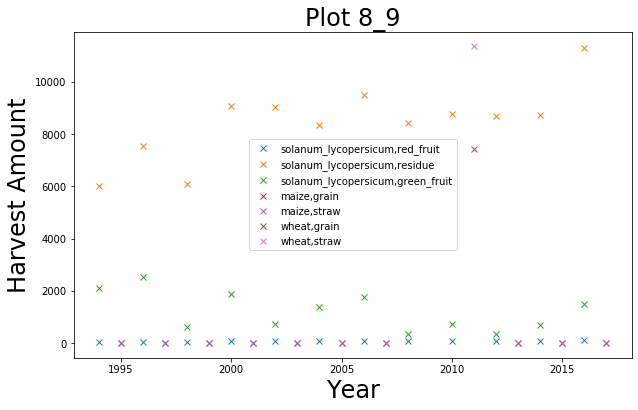

In [94]:
# How do yields vary for each crop in each plot?

plot_names = crops.plot_name.unique()
for i in range(0,len(plot_names)):
    #print("i=",i)
    fig, ax = plt.subplots(1,1, figsize=(10,6))
    crop_names = harvest[(harvest.plot_name==plot_names[i])].crop.unique()
    for j in range(0,len(crop_names)):
        #print("j=",j)
        plant_parts = harvest[(harvest.plot_name==plot_names[i])&(harvest.crop==crop_names[j])].plant_part.unique()
        for k in range(0,len(plant_parts)):
           # print("k=", k)
            harvest_temp = harvest[(harvest.plot_name==plot_names[i])&(harvest.crop==crop_names[j])&(harvest.plant_part==plant_parts[k])]
            ax.plot(harvest_temp.year, harvest_temp.measurement_amount,'x', label='{},{}'.format(crop_names[j],plant_parts[k]))
            ax.legend(loc='best')
            ax.set_title('Plot {}'.format(plot_names[i]), fontsize=24);
            ax.set_xlabel('Year', fontsize=24)
            ax.set_ylabel('Harvest Amount', fontsize=24)

Note that plot 7_1 appears to not have any data. Not sure for now what is going on with this.

There are no strong trends in these plots. Options:

1. Could try finding linear regressions for each. 
2. Could try plotting total yield, not separated by plant type -- do I need to convert to something like percentage increase to account for the fact that different crops have different absolute values of yields?


In [10]:
crop_names = harvest.crop.unique()
crop_names


array(['solanum_lycopersicum', 'winter_cover_plants', 'maize', 'wheat',
       'medicago_sativa'], dtype=object)

Create a single figure to show the crop planting plan over all fields.

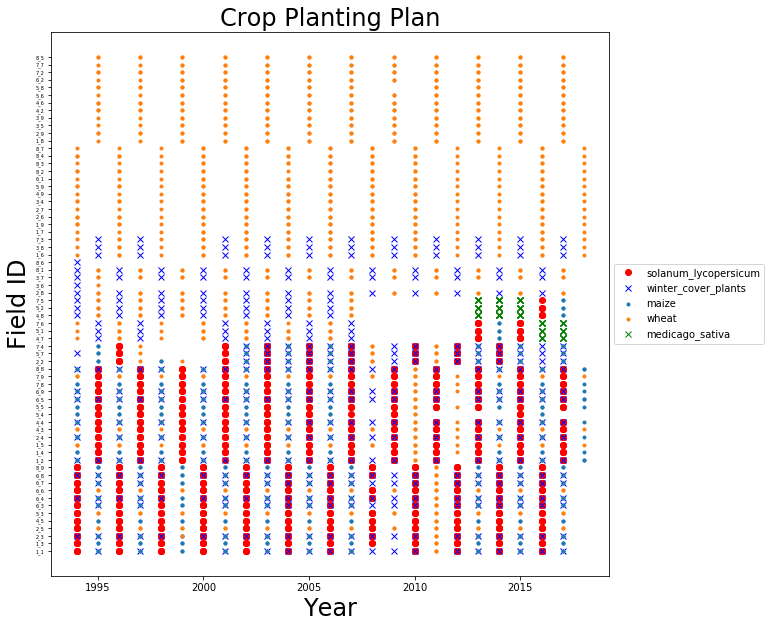

In [12]:
import re
solanum_lycopersicum = re.compile("solanum_lycopersicum$") # initiate regex for searching within for loop
winter_cover_plants = re.compile("winter_cover_plants$")
maize = re.compile("maize$")
wheat = re.compile("wheat$")

crop_names = harvest.crop.unique()
fig, ax = plt.subplots(1,1, figsize=(10,10))
for i in range(0,len(crop_names)):
    crop_year=harvest[harvest.crop==crop_names[i]].year
    crop_field = harvest[harvest.crop==crop_names[i]].plot_name
    if solanum_lycopersicum.search(crop_names[i]):
        ax.plot(crop_year,crop_field,'ro',label='{}'.format(crop_names[i]))
    elif winter_cover_plants.search(crop_names[i]):
        ax.plot(crop_year,crop_field,'bx',label='{}'.format(crop_names[i]))
    elif maize.search(crop_names[i]) or wheat.search(crop_names[i]):
        ax.plot(crop_year,crop_field,'.',label='{}'.format(crop_names[i]))
    else:
        ax.plot(crop_year,crop_field,'gx',label='{}'.format(crop_names[i]))
    #ax.legend(loc='best')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_title('Crop Planting Plan', fontsize=24);
    ax.set_xlabel('Year', fontsize=24)
    ax.set_ylabel('Field ID', fontsize=24)
    ax.tick_params(axis='y',labelsize=5)

This figure is useful in visualizing the crop planting plan on a broad scale. About half of fields are just being used for wheat, either with or without cover crops. For those with cover crops, fields alternate as to which year supports which crop, perhaps to account for interannual variability in weather.

The other half of the fields grow the full variety of crops, alternating tomatoes with either maize or wheat. Some of these fields incorporate cover crops either every year or in some years. Alfalfa is introduced in some fields in 2010. 

**Questions:**
1. How does complexity of crop rotation affect yield?
2. How does incorporation of cover crops affect yield?

Wheat is the common factor among all fields. How does wheat yield vary based on these factors? And what about fertilizer use?...

### Irrigation Use

When and where was irrigation used? Create a plot showing the irrigation plan across all fields in each year. Keep in mind that the metadata states that it is difficult to quantify irrigation.

First, note that not all fields have irrigation data. The fields without irrigation specified only received rainfall.

The information that might turn out to be most useful is simply whether or not irrigation was used.

In [13]:
irr.plot_name.unique()

array(['1_1', '1_2', '1_3', '1_4', '1_5', '2_3', '2_4', '2_5', '2_6',
       '2_7', '3_4', '4_3', '4_4', '4_5', '4_7', '5_1', '5_3', '5_4',
       '5_5', '6_1', '6_3', '6_4', '6_5', '6_6', '6_7', '6_8', '6_9',
       '7_6', '7_8', '7_9', '8_4', '8_7', '8_8', '8_9', '2_2', '3_5',
       '3_6', '4_2', '4_6', '4_8', '5_2', '5_6', '5_7', '7_4', '7_5',
       '7_7', '8_5', '8_6', '7_1'], dtype=object)

Irrigation data contains multiple entries per year. Let's start by looking at the total amount of water applied to a field in a given year. To do this, for each field, group data by year and take the sum. 

In [14]:
irr_byfield_byyear = irr.groupby(['plot_name','year'],as_index=False)['irrigation_amount'].sum()
irr_byfield_byyear

plot_name  year  irrigation_amount
0         1_1  1994             343.49
1         1_1  1995             471.25
2         1_1  1996             596.44
3         1_1  1997             747.08
4         1_1  1998             254.10
..        ...   ...                ...
588       8_9  2007             285.72
589       8_9  2008             168.75
590       8_9  2009              67.58
591       8_9  2016             242.57
592       8_9  2017             284.43

[593 rows x 3 columns]

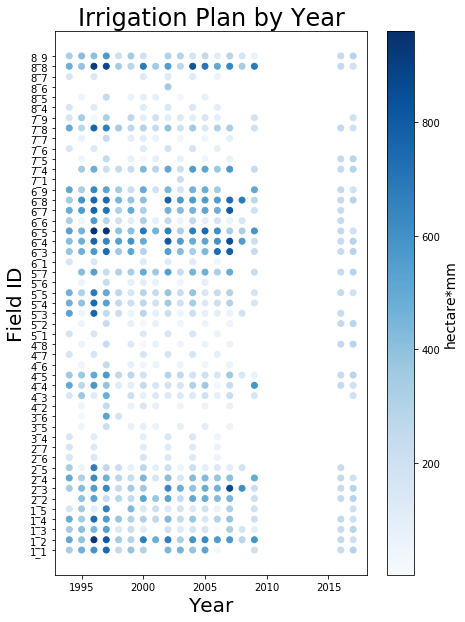

In [15]:
# create figure
fig, ax = plt.subplots(figsize=(7, 10))
plt.scatter(irr_byfield_byyear.year,irr_byfield_byyear.plot_name,c=irr_byfield_byyear.irrigation_amount,marker='o',cmap='Blues')
cbar = plt.colorbar()
cbar.set_label('hectare*mm', fontsize=14)
plt.title('Irrigation Plan by Year', fontsize=24);
plt.xlabel('Year', fontsize=20)
plt.ylabel('Field ID', fontsize=20);


Create a new dataframe that tracks which field received irrigation and which received only rainfall.

In [16]:
# initiate dataframe
irr_bin = pd.DataFrame()
irr_bin['plot_name']=crops.plot_name

# default is rainfall
irr_bin['irr_type']='rain'

In [17]:
# set irr_type to 'manual' if it exists in irr dataframe
for field in irr.plot_name:
    irr_bin.irr_type = np.where((irr_bin.plot_name==field),'manual',irr_bin.irr_type)

### Fertlizer Use

When and where was each fertilizer used? Create a plot showing what fertilizers were used in what fields in each year.

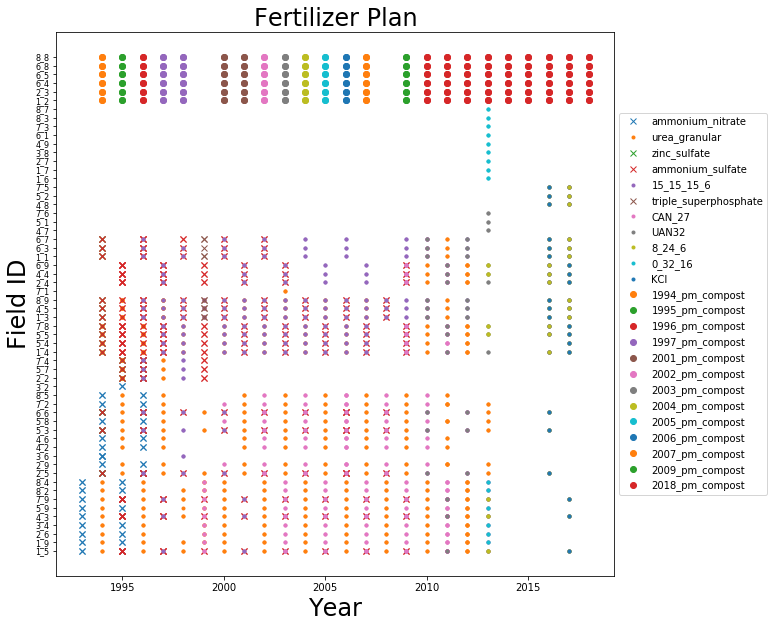

In [18]:
import re
compost = re.compile("compost$") # initiate regex for searching within for loop
ate = re.compile("ate$")

fertilizer_names = nut_amt.fertilizer_name.unique()
fig, ax = plt.subplots(1,1, figsize=(10,10))
for i in range(0,len(fertilizer_names)):
    fert_year=nut_amt[nut_amt.fertilizer_name==fertilizer_names[i]].year
    fert_field = nut_amt[nut_amt.fertilizer_name==fertilizer_names[i]].plot_name
    if compost.search(fertilizer_names[i]):
        ax.plot(fert_year,fert_field,'o',label='{}'.format(fertilizer_names[i]))
    elif ate.search(fertilizer_names[i]):
        ax.plot(fert_year,fert_field,'x',label='{}'.format(fertilizer_names[i]))
    else:
        ax.plot(fert_year,fert_field,'.',label='{}'.format(fertilizer_names[i]))
    #ax.legend(loc='best')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_title('Fertilizer Plan', fontsize=24);
    ax.set_xlabel('Year', fontsize=24)
    ax.set_ylabel('Field ID', fontsize=24)
    ax.tick_params(axis='y',labelsize=8)
    #plt.yticks([]) # hide field IDs on axis because they are so small and don't really matter

There is a lot going on in the above plot, but the overall pattern of colors and shapes gives a sense of the fertilizer strategy. Six fields at the top of plot received compost as fertilizer. The compost varied by year based on what was available. In some years, some fields received no fertilizer and others received multiple kinds. 

This is useful, like the Crop Planting figure above, in visualizing the experiments. However, the y-axes do not match between the two figures. Plotting numerically by plot_number rather than plot_name is problematic because it erases the patterns that pop out in each figure. To combine information from the two plans, I will need different strategies.

Ideas:
1. Focus on just the fields using compost and see how how nutrient value of compost correlates with crop yield
2. Aggregate yield data on fields with same/similar fertilizer protocol and compare among protocols
3. Can I make similar plot to visualize the crop plan?

## Cleaning fertilizer dataframe

Next I'll take a look at the relationship between nutrient inputs and crop yields. How does the crop yield in each plot in each year compare to the nutrient input? First: How much nitrogen was applied to each field in each year?

The first thing to do is to associate the amount of a nutrient that is added with each fertilizer application. Then I can combine applications into years and fields. The nutrients that are measured for most (all?) fertilizer types are N, P, K, S, Ca, Zn, Mg. I will start with nitrogen.

In [64]:
nut_amt.head()
tracker = 0
nut_amt['N_amt'] = np.nan
for fert in nut_amt.fertilizer_name.unique():
    tracker = tracker +1
    # calculate percent of nitrogen in each fertilizer type
    if compost.search(fert):
        # some composts don't have N defined, so just say it's the same as the 2001 compost
        if fert == '1994_pm_compost' or fert == '1995_pm_compost' or fert == '1996_pm_compost' or fert == '1997_pm_compost' or fert == '2005_pm_compost' or fert == '2006_pm_compost' or fert == '2018_pm_compost':
            fert_temp = '2001_pm_compost'
            N_pct = nut_comp[(nut_comp.fertilizer_name==fert_temp)&(nut_comp.soil_amendment_name=='Total N')].soil_amendment_amount
        else:
            N_pct = nut_comp[(nut_comp.fertilizer_name==fert)&(nut_comp.soil_amendment_name=='Total N')].soil_amendment_amount
    else:
        N_pct = nut_comp[(nut_comp.fertilizer_name==fert)&(nut_comp.soil_amendment_name=='N')].soil_amendment_amount
    fert_index = nut_amt[nut_amt.fertilizer_name==fert].index # where to put the calculation
    fert_amount = nut_amt[nut_amt.fertilizer_name==fert].fertilization_amount.values*N_pct.values/100
    # assign amount of nutrient applied in each fertilizer application
    nut_amt.loc[fert_index,'N_amt'] = fert_amount
    

In [31]:
nut_amt.groupby(['plot_name','year','plot_side']).describe()

fertilization_amount                          \
                                          count        mean         std   
plot_name year   plot_side                                                
1_1       1994.0 E                          2.0  348.500000  412.243253   
                 W                          2.0  348.500000  412.243253   
          1996.0 E                          3.0  280.666667   23.671361   
                 W                          3.0  280.666667   23.671361   
          1998.0 E                          2.0  421.000000  159.806133   
...                                         ...         ...         ...   
8_9       2011.0 W                          1.0  122.000000         NaN   
          2012.0 E                          2.0  343.000000    9.899495   
                 W                          2.0  343.000000    9.899495   
          2016.0 COMPOSITE                  6.0  148.000000   84.623874   
          2017.0 COMPOSITE                  6.0  148.500000   90.006111   

                                                                plot_number  \
                              min     25%    50%     75%    max       count   
plot_name year   plot_side                                                    
1_1       1994.0 E           57.0  202.75  348.5  494.25  640.0         2.0   
                 W           57.0  202.75  348.5  494.25  640.0         2.0   
          1996.0 E          267.0  267.00  267.0  287.50  308.0         3.0   
                 W          267.0  267.00  267.0  287.50  308.0         3.0   
          1998.0 E          308.0  364.50  421.0  477.50  534.0         2.0   
...                           ...     ...    ...     ...    ...         ...   
8_9       2011.0 W          122.0  122.00  122.0  122.00  122.0         1.0   
          2012.0 E          336.0  339.50  343.0  346.50  350.0         2.0   
                 W          336.0  339.50  343.0  346.50  350.0         2.0   
          2016.0 COMPOSITE   88.0   96.50  120.5  148.25  313.0         6.0   
          2017.0 COMPOSITE   53.0   97.25  140.5  156.00  313.0         6.0   

                                  ...             N_amt                    \
                            mean  ...   75%   max count   mean        std   
plot_name year   plot_side        ...                                       
1_1       1994.0 E          11.0  ...  11.0  11.0   2.0  67.20  95.035151   
                 W          11.0  ...  11.0  11.0   2.0  67.20  95.035151   
          1996.0 E          11.0  ...  11.0  11.0   3.0  52.78   5.698447   
                 W          11.0  ...  11.0  11.0   3.0  52.78   5.698447   
          1998.0 E          11.0  ...  11.0  11.0   2.0  79.17  46.626621   
...                          ...  ...   ...   ...   ...    ...        ...   
8_9       2011.0 W          89.0  ...  89.0  89.0   1.0  56.12        NaN   
          2012.0 E          89.0  ...  89.0  89.0   2.0  81.20  43.557778   
                 W          89.0  ...  89.0  89.0   2.0  81.20  43.557778   
          2016.0 COMPOSITE  89.0  ...  89.0  89.0   6.0  30.04  17.178349   
          2017.0 COMPOSITE  89.0  ...  89.0  89.0   6.0  35.00  13.723277   

                                                                   
                              min     25%    50%      75%     max  
plot_name year   plot_side                                         
1_1       1994.0 E           0.00  33.600  67.20  100.800  134.40  
                 W           0.00  33.600  67.20  100.800  134.40  
          1996.0 E          46.20  51.135  56.07   56.070   56.07  
                 W          46.20  51.135  56.07   56.070   56.07  
          1998.0 E          46.20  62.685  79.17   95.655  112.14  
...                           ...     ...    ...      ...     ...  
8_9       2011.0 W          56.12  56.120  56.12   56.120   56.12  
          2012.0 E          50.40  65.800  81.20   96.600  112.00  
                 W          50.40  65.800 

Also note that the units of compost are 't/ha', while the units of chemical fertilizers are 'kg/ha'. I should not need to combine fields with compost and chemical ammendments, so this should not be an issue for now.

Note that in the nut_amt dataframe, plots are sometimes divided in half to 'E' and 'W' sides. However, the harvest dataframe only includes 'composite' harvest data. As such, I will take the average value for 'E' and 'W' where they are split to represent a 'composite' value. 

In [68]:
nut_amt['full_field_N_amt'] = np.nan
for i in range(0,len(nut_amt)):  # go through each row in nut_amt dataframe
    if nut_amt.plot_side[i] == 'COMPOSITE':
        nut_amt.full_field_N_amt[i] = nut_amt.N_amt[i]  # composite already represents the full field
    if nut_amt.plot_side[i] == 'E':             # if the field is split into and 'E' side, 
        nut_amt.full_field_N_amt[i] = np.mean([nut_amt.N_amt[i],nut_amt.N_amt[i+1]])
        

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Clean dataframe by removing "plot_side" and "full_field_N_amt" columns and getting rid of 'W' side entries, which are now no longer used in the full_field_N_amt column.

In [74]:
nut_amt_full_field = nut_amt[nut_amt.plot_side != 'W']      # copy the full dataframe, exclude rows where plot_side is 'W'
nut_amt_full_field = nut_amt_full_field.drop(columns=['plot_side', 'N_amt'])  # delete columns that are no longer needed

Now sum the amount of nitrogen added to each field in each year.

In [83]:
yearly_N = nut_amt_full_field.groupby(['plot_name','year'])['full_field_N_amt'].sum()
yearly_N

plot_name  year  
1_1        1994.0    134.40
           1996.0    158.34
           1998.0    158.34
           1999.0      0.00
           2000.0    157.29
                      ...  
8_9        2010.0    274.45
           2011.0     56.12
           2012.0    162.40
           2016.0    180.24
           2017.0    210.00
Name: full_field_N_amt, Length: 737, dtype: float64

I now have a pandas series that gives the total amount of N applied to each field in each year. I can use this to plot against the harvest in each field in each year.

## How does fertilizer (N) affect harvest amounts?

Answer this question by creating a scatter plot that shows the relationship between amount of N applied and the harvest yield in each field. Plot all crops on same figure.

First, get harvest data into same format as yearly_N.

In [126]:
# Yearly red tomatoes
yearly_RT = harvest[(harvest['crop']=='solanum_lycopersicum')&(harvest['plant_part']=='red_fruit')].groupby(['plot_name','year'])['measurement_amount'].sum()


In [127]:
yearly_RT

plot_name  year
1_1        1994     61.3800
           1996     44.8250
           1998     56.3575
           2000     64.9435
           2002     83.5490
                     ...   
8_9        2008     90.9715
           2010     68.9630
           2012     86.7350
           2014     87.6240
           2016    123.9915
Name: measurement_amount, Length: 326, dtype: float64

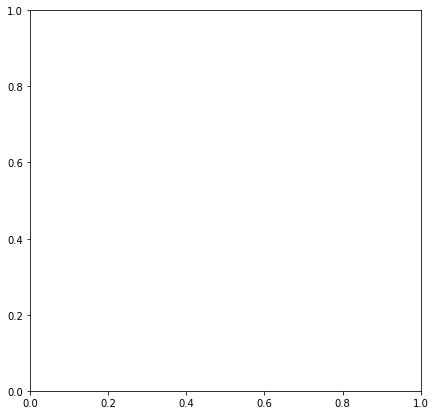

In [93]:
fig, ax = plt.subplots(figsize=(7, 7))
plt.scatter(yearly_N,irr_byfield_byyear.plot_name,c=irr_byfield_byyear.irrigation_amount,marker='o',cmap='Blues')
cbar = plt.colorbar()
cbar.set_label('hectare*mm', fontsize=14)
plt.title('Irrigation Plan by Year', fontsize=24);
plt.xlabel('Year', fontsize=20)
plt.ylabel('Field ID', fontsize=20);

Current problem: fertilizer application and red tomatoes series do not have same year indices!